#Import libraries 

In [1]:

#regular expressions 
import re 
#matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['pdf.fonttype'] = 42

#pandas for working with dataframes
import pandas as pd 
from pandas import DataFrame, read_csv
#numpy
import numpy as np
#Really just for any utilities I might want. 
import sys 
#csv reader
import csv

import palettable as pal
from palettable.colorbrewer.qualitative import Paired_12

# Enable inline plotting
%matplotlib inline

/Users/eleanorbors/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module PIL was already imported from /Users/eleanorbors/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/PIL/__init__.pyc, but /Users/eleanorbors/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


#Define file paths and color dictionay 

In [2]:
#Enter file path on your computer to the .evec file output from EIGENSOFT 
file_path = './lionfish_b9_p8_r80_nooutlier.evec'


#Color dictionary for lionfish modern populations
##You will need to create you own color key that matched your population names

colors = {'CAY': '#F46D43', 'BEL': '#ABDDA4', 'DOM': '#5E4FA2', 'HON': '#FEE08B', 'NC': '#FF7F00', 'USV': '#FFFFBF', 
          'JAM': '#3288BD', 'FLO': '#4A4A4A', 'LIS': '#CAB2D6', 'BER': '#6A3D9A', 'MEX': '#FDAE61', 'BAH': '#9E0142'}


#Define Functions 

In [3]:
#This cell defines the functions to be used later 

def make_PCA_table(evec_file_path, eigenvec_df_name):
    eigenvec_df_name = pd.read_table(evec_file_path, skiprows= 1, header = None, sep=r"\s+")
    eigenvec_df_name.columns = ['Sample', 'Eigvec1', 'Eigvec2', 'Eigvec3', 'Eigvec4','Eigvec5', 'Eigvec6', 'Eigvec7', 'Eigvec8', 'Eigvec9', 'Eigvec10', 'population'] 
    return eigenvec_df_name

def make_PCA_figure(eigenvec_df_name):
    ##Make the figure! 
    groups = eigenvec_df_name.groupby('population', sort = False)
    fig,ax= plt.subplots()
    fig.set_size_inches(10,8)
    for key, group in groups:
        group.plot(kind='scatter', x='Eigvec1', y='Eigvec2', color = colors[key], ax=ax, label = key, marker = 'o', 
                   s = 150, edgecolors='black', fontsize = 14)
    ax.legend(loc='upper left', fontsize=14, ncol=1, scatterpoints=1)
    #Optional to set the X and Y limits for figures 
    #ax.set_ylim([-0.2,0.55])
    #ax.set_xlim([-0.2, 0.2])
    plt.xlabel("First Eigenvector", fontsize = 16)
    plt.ylabel("Second Eigenvector", fontsize = 16)
    plt.title("1st and 2nd Eigenvector, Modern Lionfish", fontsize = 20, y=1.05)
   


#Make figures

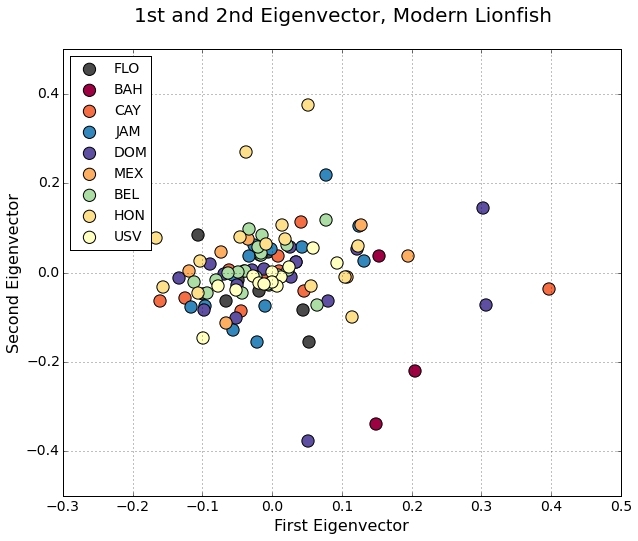

In [4]:
eigenvectors = make_PCA_table(file_path, 'test')
make_PCA_figure(eigenvectors)

#Make double panel graph for first 3 eigenvectors 

In [2]:
groups = eigenvectors.groupby('population', sort = False)
fig,(ax1, ax2)= plt.subplots(1, 2, sharey = True)
fig.set_size_inches(20,8)

colors = {'CAY': '#F46D43', 'BEL': '#ABDDA4', 'DOM': '#5E4FA2', 'HON': '#FEE08B', 'NC': '#FF7F00', 'USV': '#FFFFBF', 
          'JAM': '#3288BD', 'FLO': '#4A4A4A', 'LIS': '#CAB2D6', 'BER': '#6A3D9A', 'MEX': '#FDAE61', 'BAH': '#9E0142'}

for key, group in groups:
    group.plot(kind='scatter', x='Eigvec1', y='Eigvec2', color = colors[key], ax=ax1, marker = 'o', 
                   s = 250, edgecolors='black', fontsize = 14)
for key, group in groups:
    group.plot(kind='scatter', x='Eigvec2', y='Eigvec3', color = colors[key], ax=ax2, label = key, marker = 'o', 
                   s = 250, edgecolors='black', fontsize = 14)

ax1.set_ylabel("Second Eigenvector", fontsize = 16)
ax1.set_xlabel('First Eigenvector', fontsize = 16)

ax2.set_ylabel("Third Eigenvector", fontsize = 16)
ax2.set_xlabel('Second Eigenvector', fontsize = 16)

ax1.set_title("1st and 2nd Eigenvector", fontsize = 20, y=1.05)
ax2.set_title("2nd and 3rd Eigenvector", fontsize = 20, y=1.05)

ax2.legend(loc='center left', fontsize=14, ncol=1, scatterpoints=1, bbox_to_anchor=(1, 0.5))
#ax1.set_ylim([-0.65,0.7])
#ax1.set_xlim([-0.5, 0.6])
#ax2.set_xlim([-0.5, 0.6])

fig.savefig("/Users/eleanorbors/Desktop/Manuscripts/Lionfish_ms1_modern/figures_for_paper/PCA_b9_p8_r80_remove_outliers.pdf", format='pdf', dpi=1000)

NameError: name 'eigenvectors' is not defined